In [1]:
import numpy as np
import scipy.optimize as optim
import math
import os,sys
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
def TBfunc(x,b):
    return (460*(1 - np.exp(b*(100.0-x))))
    
    #return (a + b*(x-np.log(100)))

In [3]:
data_folder = '/Users/sns9/Research/GrowthCurves/NISTAODAPI79/'
os.chdir(data_folder)

In [4]:
v7 = pd.read_csv('AODAPI-T2-7.csv').to_numpy()[:-1,:]
v9 = pd.read_csv('AODAPI-T2-9.csv').to_numpy()[:-1,:]
v5 = pd.read_csv('AODAPI-T2-5.csv').to_numpy()[:-1,:]

v7 = np.flip(v7,0)
v9 = np.flip(v9,0)
v5 = np.flip(v5,0)

In [12]:
#v_data = pd.read_csv('Viability_T1-ATP-fit.csv',)
v0 = pd.read_csv('AODAPI-T2-0.csv').to_numpy()
v24 = pd.read_csv('AODAPI-T2-24.csv').to_numpy()
v48 = pd.read_csv('AODAPI-T2-48.csv').to_numpy()
v72 = pd.read_csv('AODAPI-T2-72.csv').to_numpy()

FileNotFoundError: [Errno 2] File AODAPI-T2-0.csv does not exist: 'AODAPI-T2-0.csv'

In [ ]:
#popt, pcov = optim.curve_fit(ATPfunc,np.log(v24[:,0]),np.log(v24[:,3]))
popt, pcov = optim.curve_fit(TBfunc,v24[:,0],v24[:,3])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

In [ ]:
popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
#popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
#popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

tb24 = np.linspace(70,100,501)
#tb24 = math.exp(1)**l_tb24
ts24 = TBfunc(tb24,popt[0])

#print(ts7)

t_ul24 = TBfunc(tb24,popt_ul[0])
t_ll24 = TBfunc(tb24,popt_ll[0])

#print(ts24)

In [5]:
rgba_colors = np.zeros((7,4))
alphas = np.linspace(0.1, 1, 7)
rgba_colors[:,3] = alphas
rgba_colors[:,3] = alphas

In [6]:
#weights = pd.Series([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

weights = pd.Series([0.7, 0.6, 0.5, 0.4, 0.3, 0.2])
colorsR = weights.apply(lambda x: (1,0,0,x)).tolist()

colorsB = weights.apply(lambda x: (0,0,1,x)).tolist()

colorsG = weights.apply(lambda x: (0,1,0,x)).tolist()

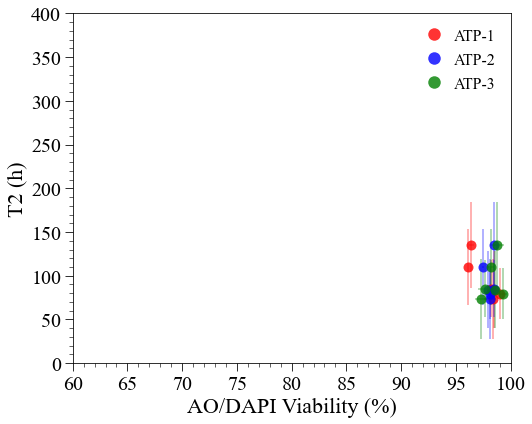

In [14]:
fig, axs = plt.subplots(figsize=(7.5,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

plt.errorbar(v7[:,0],v7[:,3],v7[:,4],v7[:,1],fmt='o',alpha=0.3,lw=2,mew=0,ms=0,c='r',capsize=5,capthick=1)
plt.plot(v7[:,0],v7[:,3],marker='o',alpha=0.8,lw=0.0,mew=0,ms=10,c='r',label='ATP-1')
#plt.plot(v0[:,0],v0[:,3],marker='o',linewidth=0,ms=8,color='#000000',alpha=0.7,label='0 h',mew=0)
#plt.scatter(v7[:,0],v7[:,3],c=colorsR,s=80,label='ATP-1',edgecolors='None')

plt.errorbar(v9[:,0],v9[:,3],v9[:,4],v9[:,1],fmt='o',lw=2,alpha=0.3,mew=0,ms=0,c='b',capsize=5,capthick=1)
plt.plot(v9[:,0],v9[:,3],marker='o',lw=0.0,alpha=0.8,mew=0,ms=10,c='b',label='ATP-2')
#plt.plot(v24[:,0],v24[:,3],marker='o',linewidth=0,ms=8,color='c',alpha=0.7,label='24 h',mew=0)
#plt.plot(tb24,ts24,linewidth=1.5,color='c',alpha=0.9,label=r'460$(1-e^{-0.09[\mathrm{TBlue}]})$')
#plt.scatter(v9[:,0],v9[:,3],c=colorsB,s=80,label='ATP-2',edgecolors='None')
#plt.fill_between(tb24,t_ll24,t_ul24,color='c',alpha=0.2)

plt.errorbar(v5[:,0],v5[:,3],v5[:,4],v5[:,1],fmt='o',lw=2,alpha=0.3,mew=0,ms=0,c='g',capsize=5,capthick=1)
plt.plot(v5[:,0],v5[:,3],marker='o',lw=0.0,alpha=0.8,mew=0,ms=10,c='g',label='ATP-3')
#plt.plot(v24[:,0],v24[:,3],marker='o',linewidth=0,ms=8,color='c',alpha=0.7,label='24 h',mew=0)
#plt.plot(tb24,ts24,linewidth=1.5,color='c',alpha=0.9,label=r'460$(1-e^{-0.09[\mathrm{TBlue}]})$')
#plt.scatter(v5[:,0],v5[:,3],c=colorsG,s=80,label='ATP-3',edgecolors='None')

#plt.errorbar(v48[:,0],v48[:,3],v48[:,4],v48[:,1],fmt='o',lw=2,alpha=0.7,mew=2,ms=7,color='m',capsize=5,capthick=1,label='48 h')
#plt.plot(v48[:,0],v48[:,3],marker='o',linewidth=0,ms=8,color='m',alpha=0.7,label='48 h',mew=0)

#plt.errorbar(v72[:,0],v72[:,3],v72[:,4],v72[:,1],fmt='o',lw=3,alpha=0.7,mew=2,ms=7,color='y',capsize=5,capthick=1,label='72 h')
#plt.plot(v72[:,0],v72[:,3],marker='o',linewidth=0,ms=8,color='y',alpha=0.7,label='72 h',mew=0)

plt.xticks(size=20)
plt.yticks(size=20)  
plt.xlabel(r'AO/DAPI Viability (%)',size=22)
plt.ylabel(r'T2 (h)',size=22,rotation=90)
plt.minorticks_on()
plt.xlim(60,100)
plt.ylim(0,400)
axs.tick_params(which='major', length=8)
axs.tick_params(which='minor', length=4)
plt.legend(frameon=False,prop={'size': 16},markerscale=1.25,handlelength=1.0)
plt.tight_layout()

plt.savefig('AODAPI-summary795-2.png',dpi=600)

In [ ]:
xs = v_data['AODAPI'].to_numpy()
max_atp = np.max(xs)
print(xs)

In [ ]:
x_data = np.zeros(shape=(n_data*xs.shape[0],))
y_data = np.zeros(shape=(n_data*xs.shape[0],))

n = 0

for k in list(v_data):
    if 'T2' in k:
        x_data[n:n+xs.shape[0]] = xs #- ATP_offset
        y_data[n:n+xs.shape[0]] = v_data[k].to_numpy()
        
        n += xs.shape[0]
        
print(x_data,y_data)

In [ ]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(x_data),np.log(y_data))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

In [ ]:
#atp_array = np.log(np.linspace(0.2,0.8,51))#-ATP_offset)
atp_array = np.log(np.linspace(60,100,51))#-ATP_offset)
ts = math.exp(1)**ATPfunc(atp_array,popt[0],popt[1])

t_ul = math.exp(1)**ATPfunc(atp_array,popt_ul[0],popt_ul[1])
t_ll = math.exp(1)**ATPfunc(atp_array,popt_ll[0],popt_ll[1])

#atp_array = np.log(np.linspace(90,100,41))

total_data = np.zeros(shape=(ts.shape[0],4))
total_data[:,0] = math.exp(1)**atp_array #+ ATP_offset
total_data[:,1] = ts
total_data[:,2] = t_ul - ts
total_data[:,3] = ts - t_ll

cols = ['x','y','+','-']
solved_data = pd.DataFrame(total_data,columns=cols)
solved_data.to_csv('pairedAODAPIT2_fit-24-g.csv',index=None)
#solved_data.to_csv('paired-AODAPI_fit-24-g.csv',index=None)

#np.savetxt('viability_fit-60.csv',total_data,delimiter=',')